# Group 7

        Mihir Mathur
        Joseph M. Anto
        Gurpreet Singh
        Japan Patel

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [2]:
col_name=["age","sex","cp","trestbps","chol",
     "fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
null_values = ['Nan','?','-','na','n/a',' ']

In [3]:
data = pd.read_csv("/Users/japanpatel/Downloads/processed.cleveland.data" ,names = col_name ,na_values=null_values)

1. 3 (age) -: years

2. 4 (sex) -: (1 = male; 0 = female)

3. 9 (cp) -: chest pain type 
        -- Value 1: typical angina 
        -- Value 2: atypical angina 
        -- Value 3: non-anginal pain 
        -- Value 4: asymptomatic 
    
4. 10 (trestbps) -: resting blood pressure (in mm Hg on admission to the hospital) 

5. 12 (chol) -: serum cholestoral in mg/dl 

6. 16 (fbs) -: fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 

7. 19 (restecg) -: resting electrocardiographic results 
            -- Value 0: normal 
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05                 mV) 
            -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
            
8. 32 (thalach) -: maximum heart rate achieved 

9. 38 (exang) -: exercise induced angina (1 = yes; 0 = no) 

10. 40 (oldpeak) -: ST depression induced by exercise relative to rest 

11. 41 (slope) -:  the slope of the peak exercise ST segment 
            -- Value 1: upsloping 
            -- Value 2: flat 
            -- Value 3: downsloping
            
12. 44 (ca) -: number of major vessels (0-3) colored by flourosopy 

13. 51 (thal) -: 3 = normal; 6 = fixed defect; 7 = reversable defect 

14. 58 (num) (the predicted attribute) -: diagnosis of heart disease (angiographic disease status) 
            -- Value 0: < 50% diameter narrowing 
            -- Value 1: > 50% diameter narrowing 


In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Handling Missing Values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
data[['ca','thal']]

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0
...,...,...
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0
301,1.0,3.0


In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64

In [8]:
data['thal'] = data.thal.fillna(float(data.thal.mode()))
data['ca'] = data.ca.fillna(float(data.ca.mode()))

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


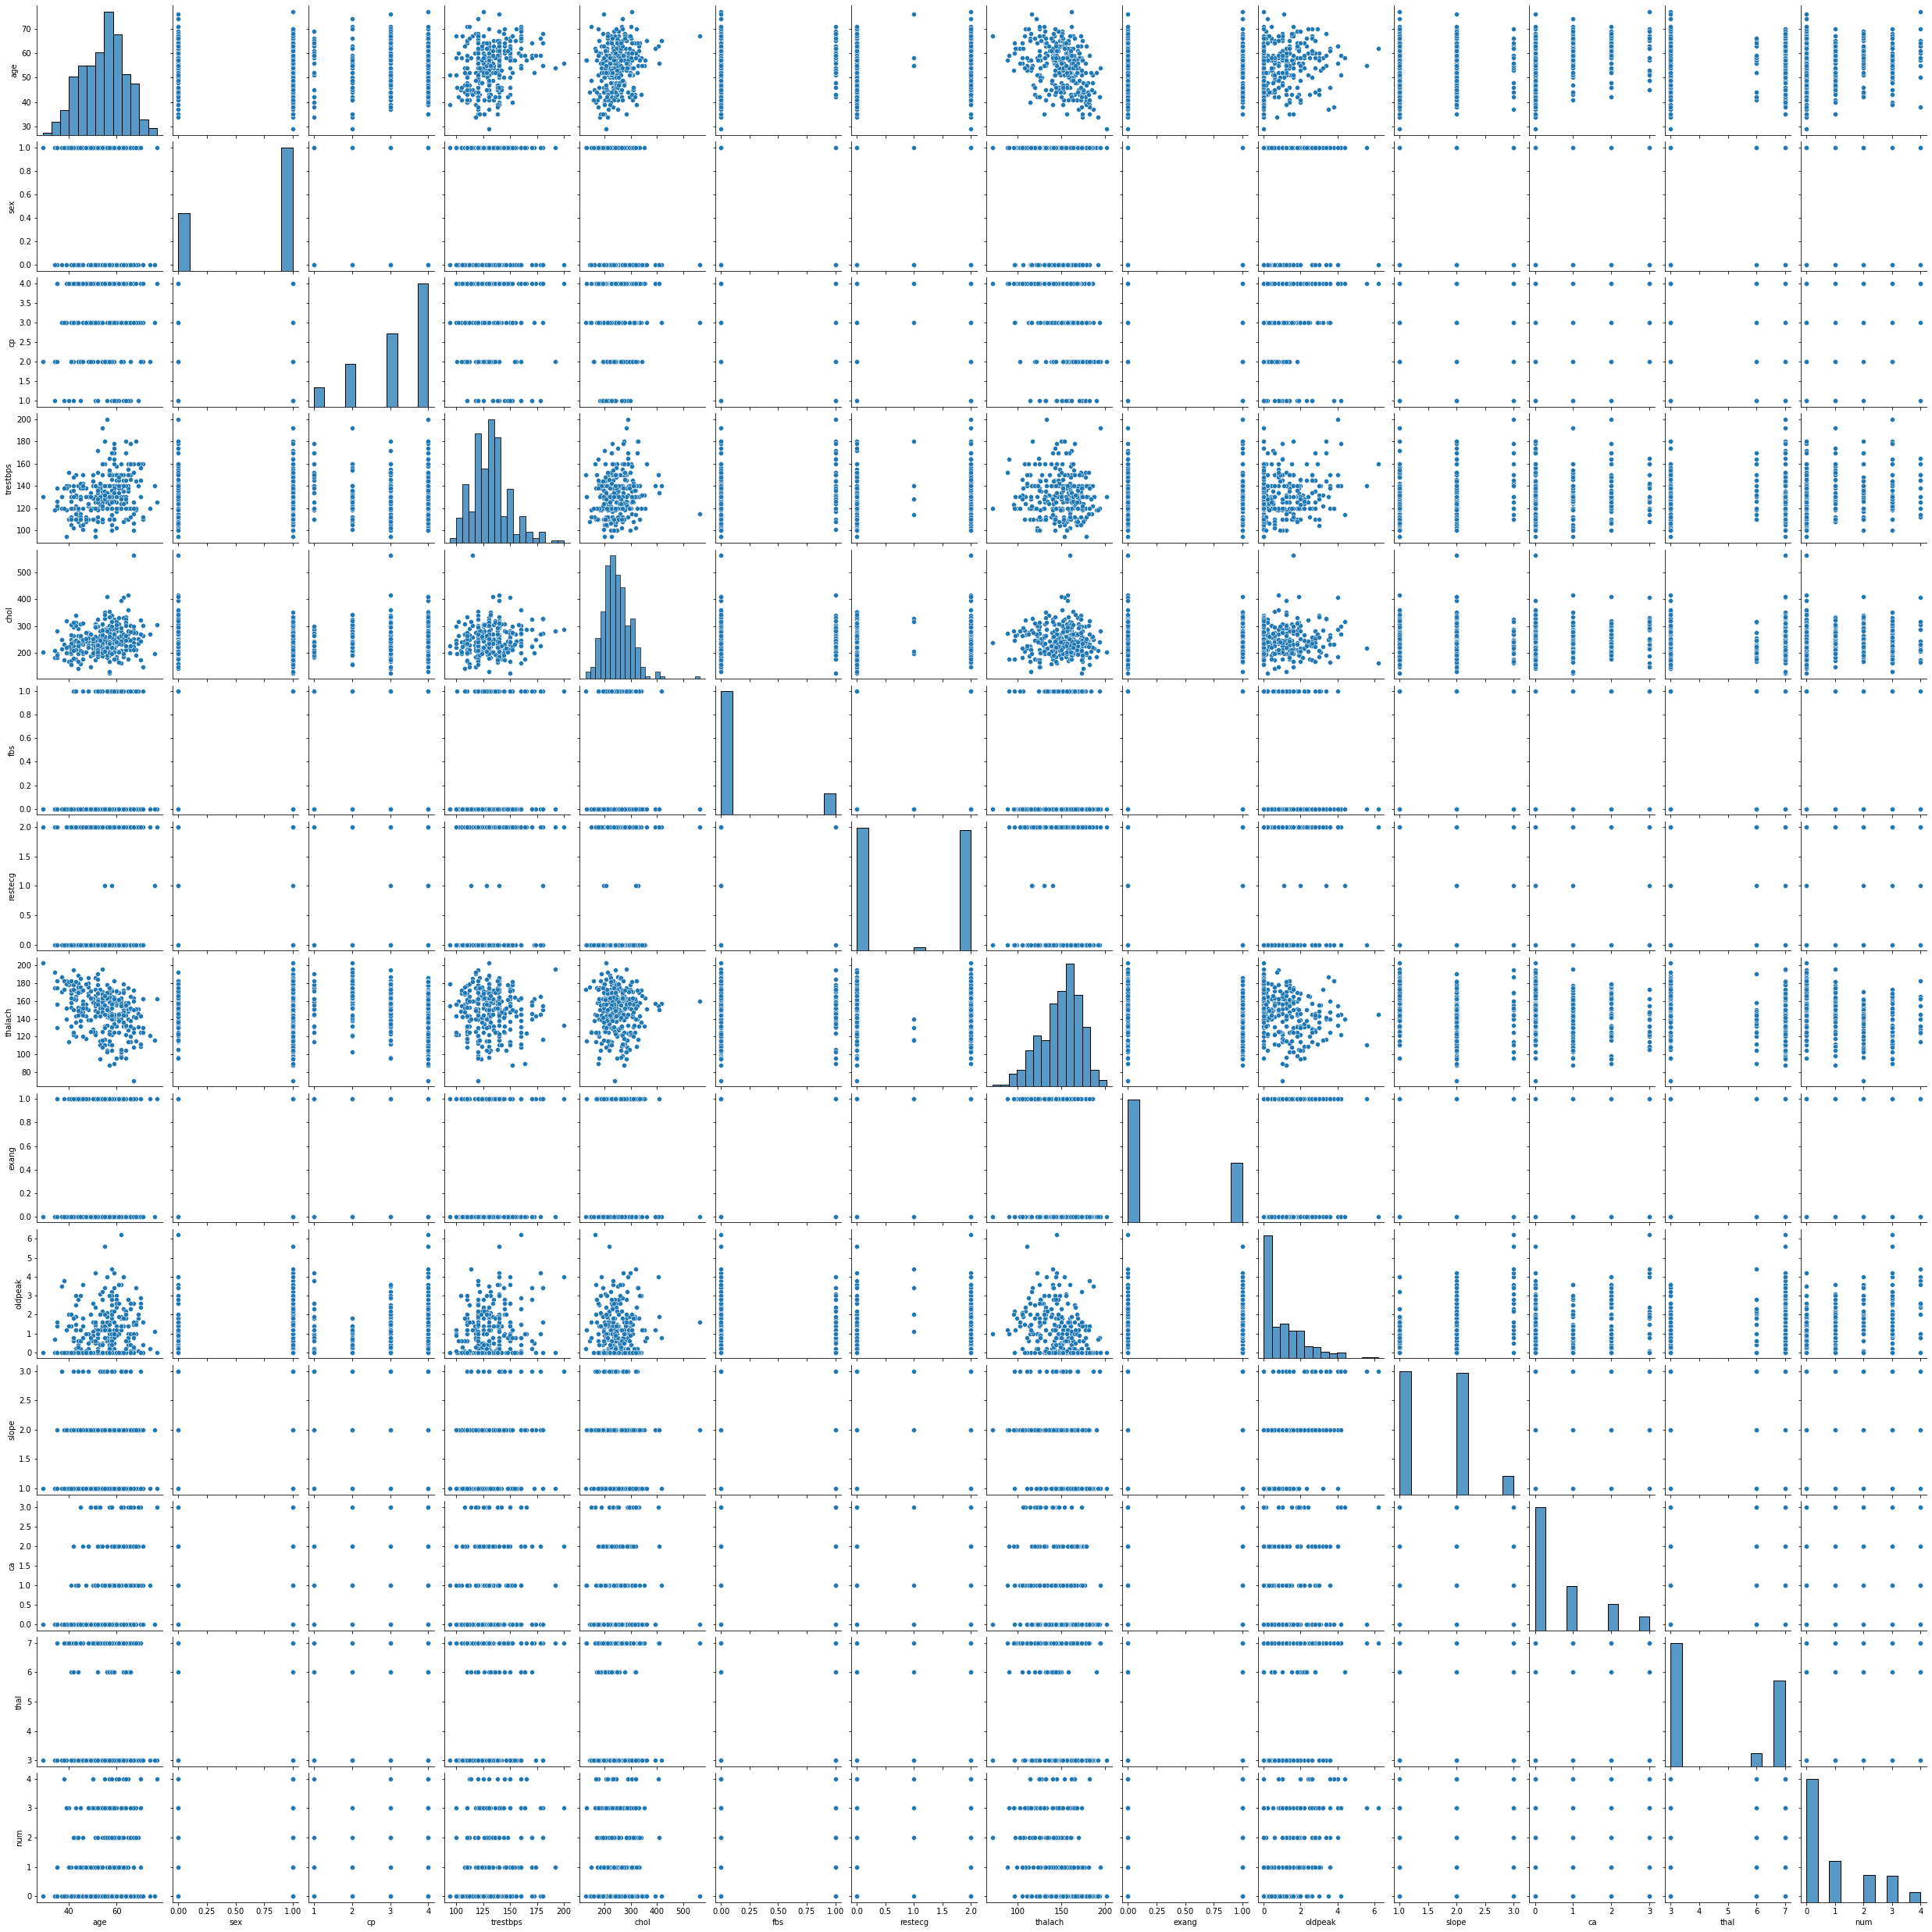

<Figure size 1152x1152 with 0 Axes>

In [12]:
sb.pairplot(data)
plt.figure(figsize=(16,16))
plt.show()

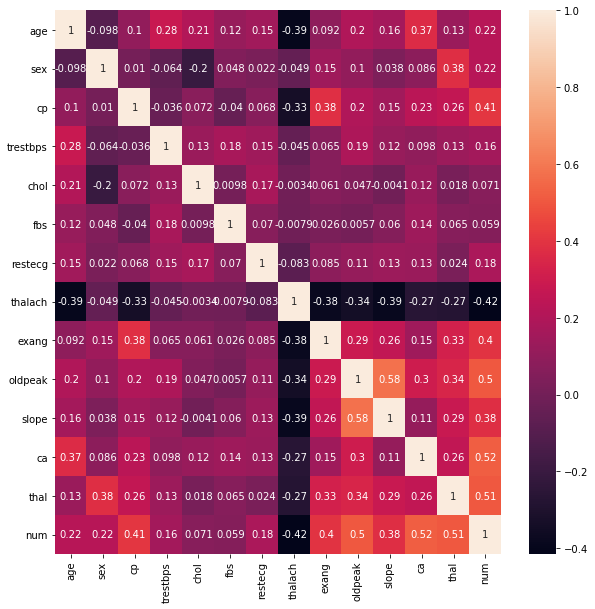

In [13]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(), annot=True)
plt.show()

# Feature Scaling

In [14]:
temp = data.drop('num',axis=1)
temp = StandardScaler().fit_transform(temp)

In [15]:
res=[]
for i in data['num']:
    if i==0:
        res.append(0)
    else:
        res.append(1)
y = res
x =temp

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Logistics regression

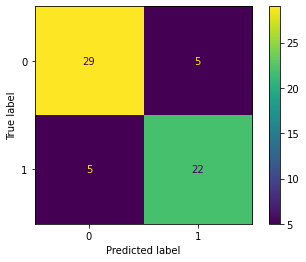

Accuracy of Logistic Regression 83.60655737704919 %


In [17]:
#logistics model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,accuracy_score

lgreg = LogisticRegression(random_state=0).fit(X_train,y_train)
acc = lgreg.score(x,y)
predict = lgreg.predict(X_test)
plot_confusion_matrix(lgreg, X_test, y_test)  
plt.show()
print('Accuracy of Logistic Regression', accuracy_score(y_test,predict)*100,'%')


# K-Nearest Neighbour

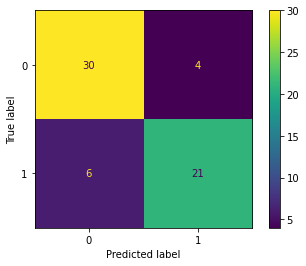

Accuracy of K Nearest Neighbour 83.60655737704919 %


In [18]:
#k-nearest neighbour
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
from sklearn import metrics 
plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()
predict = lgreg.predict(X_test)
print('Accuracy of K Nearest Neighbour', accuracy_score(y_test,y_pred)*100,'%')

# Decision Trees

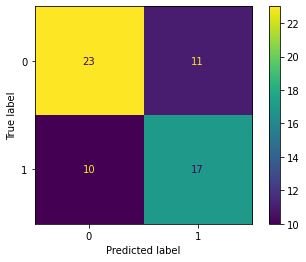

Accuracy of Decision Tree 65.57377049180327 %


In [19]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 
y_pred= classifier.predict(X_test)
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()
print('Accuracy of Decision Tree', accuracy_score(y_test,y_pred)*100,'%')

# Support Vector Machine

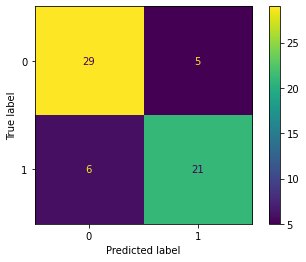

Accuracy of Support Vector Machine 81.9672131147541 %


In [20]:
#Support Vector Machine
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
print('Accuracy of Support Vector Machine', accuracy_score(y_test,y_pred)*100,'%')